In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from scipy import stats
from scipy.stats import norm, skew

from pandas.api.types import CategoricalDtype

In [2]:
df=pd.read_csv(r'C:\Users\doloy\OneDrive\Documents\policeproj\police_killings.csv', encoding = "ISO-8859-1", engine='python')
missingVals = ['Unknown']
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\doloy\\OneDrive\\Documents\\policeproj\\police_killings.csv'

In [ ]:
nominal_features=["gender","raceethnicity","month","streetaddress","state","cause","armed","county_bucket","nat_bucket"]

order_levels = {
    "county_bucket": ['1', '2', '3', '4', '5'],
    "nat_bucket": ['1', '2', '3', '4', '5'],
    "gender": ["Male", "Female"],
    "month": ["January", "February", "March", "April", "May", "June"]
    
}

def encode(df):
    for col in nominal_features:
        df[col]=df[col].astype("category")
        
    for col, order_level in order_levels.items():
        df[col] = df[col].astype(CategoricalDtype(order_level, ordered=True))
        
#     mapper = {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
#     df["ExterCond"] = df["ExterCond"].replace(mapper)
        
    return df
        
    
df = encode(df) 

In [3]:

# df.drop(['name','day','year','streetaddress','city','state_fp','county_fp','tract_ce','geo_id','namelsad','lawenforcementagency','county_id'], axis=1, inplace=True)
# df.head()

In [444]:
df.shape

(467, 34)

In [445]:
df.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [446]:
# Column Deletions:
#     -Year(its all 2015)

In [447]:
df.describe()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,urate,college
count,467.000000,467.0,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000,467.000000,465.000000,467.000000,465.000000,465.000000,465.000000
mean,15.830835,2015.0,36.403224,-96.972666,25.342612,91.584582,236936.614561,2.543443e+10,25434.197002,4783.719486,46627.182796,52527.331906,0.895913,0.117399,0.220217
std,8.658970,0.0,5.193357,16.953842,16.766458,110.185129,341262.721715,1.680140e+10,16801.379755,2374.565749,20511.194907,12948.263811,0.333584,0.069175,0.158347
min,1.000000,2015.0,19.915194,-159.642700,1.000000,1.000000,100.000000,1.003010e+09,1003.000000,0.000000,10290.000000,22545.000000,0.184049,0.011335,0.013547
25%,8.000000,2015.0,33.335240,-111.954636,8.000000,29.000000,5201.500000,8.022008e+09,8022.000000,3357.500000,32625.000000,43804.000000,0.645365,0.068592,0.106167
50%,16.000000,2015.0,35.769779,-94.761902,24.000000,63.000000,40200.000000,2.403380e+10,24033.000000,4447.000000,42759.000000,50856.000000,0.869612,0.105181,0.169544
75%,23.000000,2015.0,39.937452,-82.961582,40.000000,111.000000,378450.000000,4.011247e+10,40112.000000,5815.500000,56190.000000,56832.000000,1.081454,0.140833,0.284542
max,31.000000,2015.0,61.218408,-68.100007,56.000000,740.000000,980000.000000,5.600500e+10,56005.000000,26826.000000,142500.000000,110292.000000,2.865216,0.507614,0.828070


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   name                  467 non-null    object  
 1   age                   467 non-null    object  
 2   gender                467 non-null    category
 3   raceethnicity         467 non-null    category
 4   month                 467 non-null    category
 5   day                   467 non-null    int64   
 6   year                  467 non-null    int64   
 7   streetaddress         463 non-null    category
 8   city                  467 non-null    object  
 9   state                 467 non-null    category
 10  latitude              467 non-null    float64 
 11  longitude             467 non-null    float64 
 12  state_fp              467 non-null    int64   
 13  county_fp             467 non-null    int64   
 14  tract_ce              467 non-null    int64   
 15  geo_id

In [449]:
df.drop(['p_income', 'county_bucket', 'nat_bucket'], axis=1, inplace=True)
#Dropped the personal income,
#because we are just going to use household_income instead
#Also got rid of county_bucket and nat_bucket
df.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_white,share_black,share_hispanic,h_income,county_income,comp_income,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,60.5,30.5,5.6,51367.0,54766,0.937936,NaN,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,53.8,36.2,0.5,27972.0,40930,0.683411,NaN,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,73.8,7.7,16.8,45365.0,54930,0.825869,NaN,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,1.2,0.6,98.8,48295.0,55909,0.863814,NaN,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,92.5,1.4,1.7,68785.0,49669,1.384868,NaN,1.9,0.063550,0.403954


In [450]:
df.isnull().sum()

name                      0
age                       0
gender                    0
raceethnicity             0
month                     0
day                       0
year                      0
streetaddress             4
city                      0
state                     0
latitude                  0
longitude                 0
state_fp                  0
county_fp                 0
tract_ce                  0
geo_id                    0
county_id                 0
namelsad                  0
lawenforcementagency      0
cause                     0
armed                     0
pop                       0
share_white               0
share_black               0
share_hispanic            0
h_income                  2
county_income             0
comp_income               2
nat_bucket              467
pov                       0
urate                     2
college                   2
dtype: int64

In [451]:
df = df.dropna()
df.isnull().sum()
#Here you can see that we deleted all of the rows that had null values

In [452]:
#Convert objects to int and float
df["age"] = df["age"].astype(str).astype(int)
# df["p_income"] = df["p_income"].astype(str).astype(float)

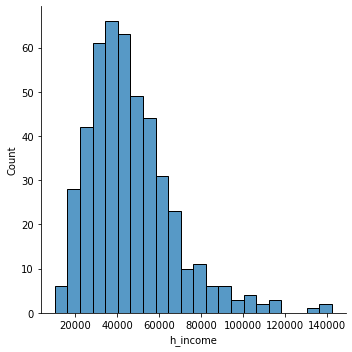

In [453]:
#The distribution for the household incomes of the data is skewed to the left and shows
#high counts for the incomes under $70,000 and peaks between $30,000-$40,000
sns.displot(df.h_income)
plt.show()

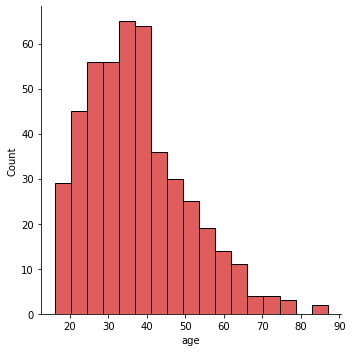

In [455]:
#Rates of killings shows a steady increase to peak 30-40 ages and drastically drops 
#with a steady declines of the ages that follow
sns.displot(df.age, color="tab:red")
plt.show()

In [456]:
# sns.displot(df.p_income)
# plt.show()

In [457]:
df.month.unique()

['February', 'April', 'March', 'January', 'May', 'June']
Categories (6, object): ['January' < 'February' < 'March' < 'April' < 'May' < 'June']

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

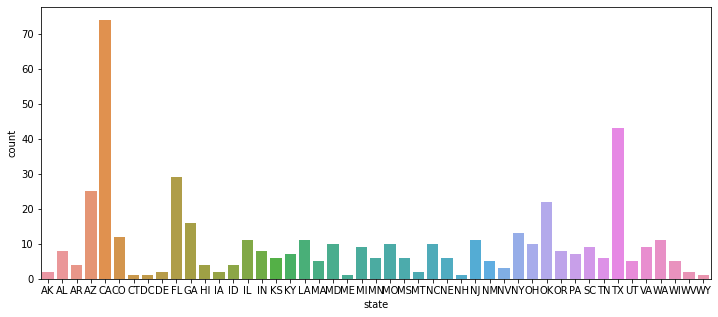

In [458]:
plt.figure(figsize=(12,5))
sns.countplot(df.state)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

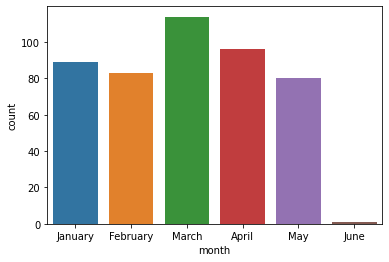

In [459]:
#Data only shows from months Jan-June but June has only two days worth of data which makes
#sense as to why count is low. March has the highest count in the first half of the year
sns.countplot(df.month)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='armed', ylabel='count'>

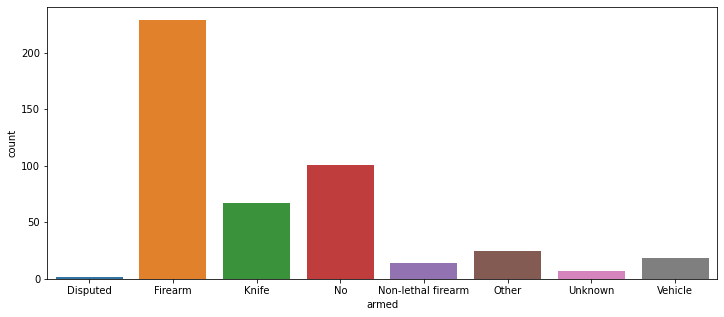

In [460]:
#Firearm as expected has the highest rate but unarmed is surprisingly second 
plt.figure(figsize=(12,5))
sns.countplot(df.armed)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cause', ylabel='count'>

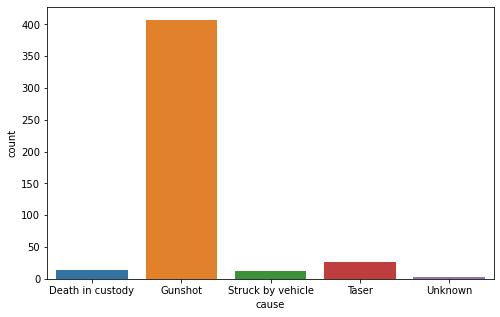

In [461]:
#Gunshots are the leading causes of death by far across all and makes sense beacause firearms have the highest rates for armed indivisuals
plt.figure(figsize=(8,5))
sns.countplot(df.cause)

In [462]:
df.state.unique()

['AL', 'LA', 'WI', 'CA', 'OH', ..., 'AK', 'MN', 'ME', 'DE', 'WY']
Length: 47
Categories (47, object): ['AL', 'LA', 'WI', 'CA', ..., 'MN', 'ME', 'DE', 'WY']

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

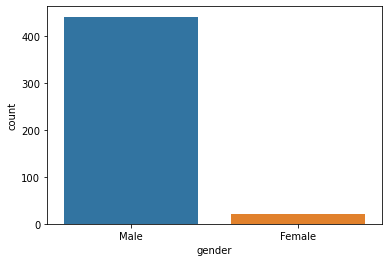

In [463]:
#Males have a much higher rate of deaths with police. Population is fairly equal with both genders.
sns.countplot(df.gender)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='raceethnicity', ylabel='count'>

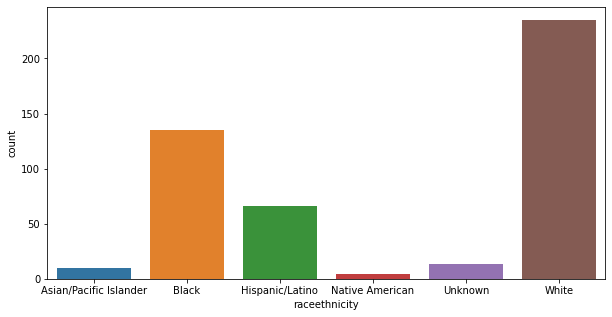

In [464]:
plt.figure(figsize=(10,5))
sns.countplot(df.raceethnicity)

<AxesSubplot:xlabel='raceethnicity', ylabel='comp_income'>

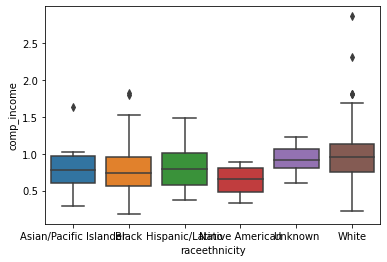

In [469]:
sns.boxplot(data=df, x='raceethnicity', y='comp_income')

In [470]:
df.groupby(['raceethnicity']).count()

,name,age,gender,month,day,year,streetaddress,city,state,latitude,...,share_white,share_black,share_hispanic,h_income,county_income,comp_income,nat_bucket,pov,urate,college
raceethnicity,,,,,,,,,,,,,,,,,,,,,
Asian/Pacific Islander,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,0,10,10,10
Black,135,135,135,135,135,135,134,135,135,135,...,135,135,135,133,135,133,0,135,133,133
Hispanic/Latino,66,66,66,66,66,66,65,66,66,66,...,66,66,66,66,66,66,0,66,66,66
Native American,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,0,4,4,4
Unknown,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,0,13,13,13
White,235,235,235,235,235,235,233,235,235,235,...,235,235,235,235,235,235,0,235,235,235


C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

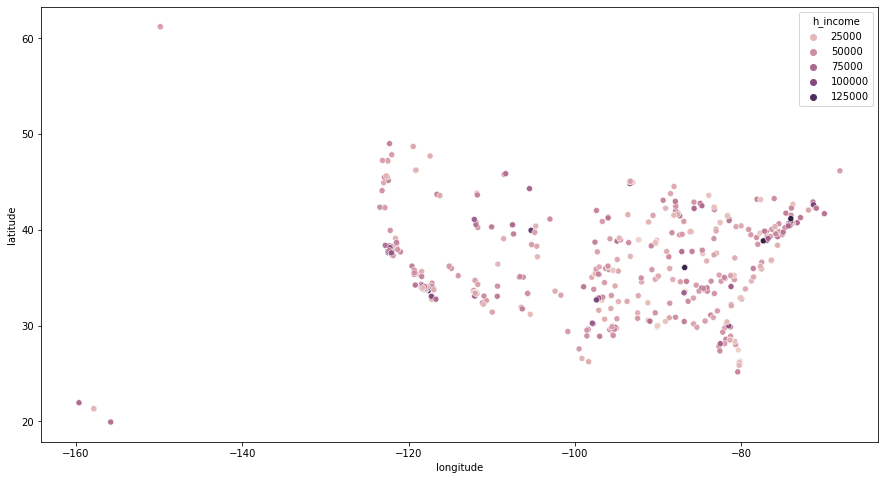

In [471]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.longitude, df.latitude, hue=df.h_income)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

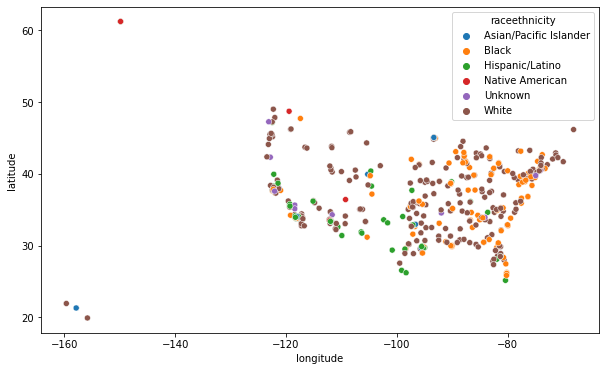

In [472]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.raceethnicity)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

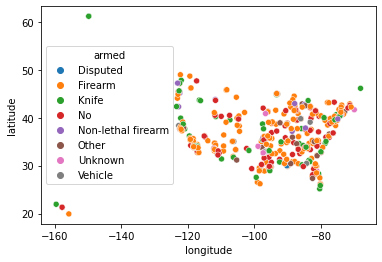

In [473]:
# plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.armed)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

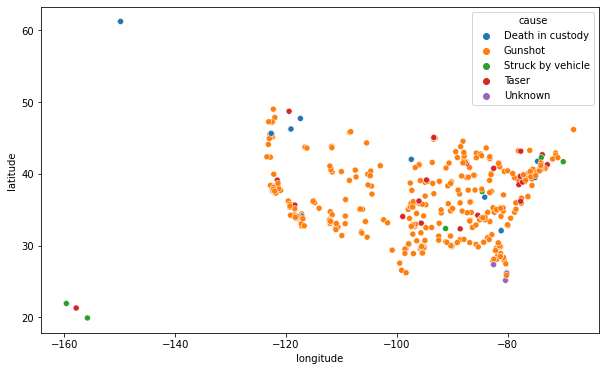

In [474]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.cause)

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 466
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   name                  463 non-null    object  
 1   age                   463 non-null    int32   
 2   gender                463 non-null    category
 3   raceethnicity         463 non-null    category
 4   month                 463 non-null    category
 5   day                   463 non-null    int64   
 6   year                  463 non-null    int64   
 7   streetaddress         459 non-null    category
 8   city                  463 non-null    object  
 9   state                 463 non-null    category
 10  latitude              463 non-null    float64 
 11  longitude             463 non-null    float64 
 12  state_fp              463 non-null    int64   
 13  county_fp             463 non-null    int64   
 14  tract_ce              463 non-null    int64   
 15  geo_id

In [476]:
df.isnull().sum()

name                      0
age                       0
gender                    0
raceethnicity             0
month                     0
day                       0
year                      0
streetaddress             4
city                      0
state                     0
latitude                  0
longitude                 0
state_fp                  0
county_fp                 0
tract_ce                  0
geo_id                    0
county_id                 0
namelsad                  0
lawenforcementagency      0
cause                     0
armed                     0
pop                       0
share_white               0
share_black               0
share_hispanic            0
h_income                  2
county_income             0
comp_income               2
nat_bucket              463
pov                       0
urate                     2
college                   2
dtype: int64

In [477]:
#df.fillna({'county_bucket': 0}, inplace=True)

In [478]:
df.isnull().sum()

name                      0
age                       0
gender                    0
raceethnicity             0
month                     0
day                       0
year                      0
streetaddress             4
city                      0
state                     0
latitude                  0
longitude                 0
state_fp                  0
county_fp                 0
tract_ce                  0
geo_id                    0
county_id                 0
namelsad                  0
lawenforcementagency      0
cause                     0
armed                     0
pop                       0
share_white               0
share_black               0
share_hispanic            0
h_income                  2
county_income             0
comp_income               2
nat_bucket              463
pov                       0
urate                     2
college                   2
dtype: int64

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 466
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   name                  463 non-null    object  
 1   age                   463 non-null    int32   
 2   gender                463 non-null    category
 3   raceethnicity         463 non-null    category
 4   month                 463 non-null    category
 5   day                   463 non-null    int64   
 6   year                  463 non-null    int64   
 7   streetaddress         459 non-null    category
 8   city                  463 non-null    object  
 9   state                 463 non-null    category
 10  latitude              463 non-null    float64 
 11  longitude             463 non-null    float64 
 12  state_fp              463 non-null    int64   
 13  county_fp             463 non-null    int64   
 14  tract_ce              463 non-null    int64   
 15  geo_id

In [480]:
df['gender']=df['gender'].astype('category').cat.codes
df['raceethnicity']=df['raceethnicity'].astype('category').cat.codes
df['month']=df['month'].astype('category').cat.codes
df['state']=df['state'].astype('category').cat.codes
df['cause']=df['cause'].astype('category').cat.codes
df['armed']=df['armed'].astype('category').cat.codes

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 466
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   name                  463 non-null    object  
 1   age                   463 non-null    int32   
 2   gender                463 non-null    int8    
 3   raceethnicity         463 non-null    int8    
 4   month                 463 non-null    int8    
 5   day                   463 non-null    int64   
 6   year                  463 non-null    int64   
 7   streetaddress         459 non-null    category
 8   city                  463 non-null    object  
 9   state                 463 non-null    int8    
 10  latitude              463 non-null    float64 
 11  longitude             463 non-null    float64 
 12  state_fp              463 non-null    int64   
 13  county_fp             463 non-null    int64   
 14  tract_ce              463 non-null    int64   
 15  geo_id

In [482]:
df.drop(['name','day','year','streetaddress','city','state_fp','county_fp','tract_ce','geo_id','namelsad','lawenforcementagency','county_id'], axis=1, inplace=True)


<AxesSubplot:>

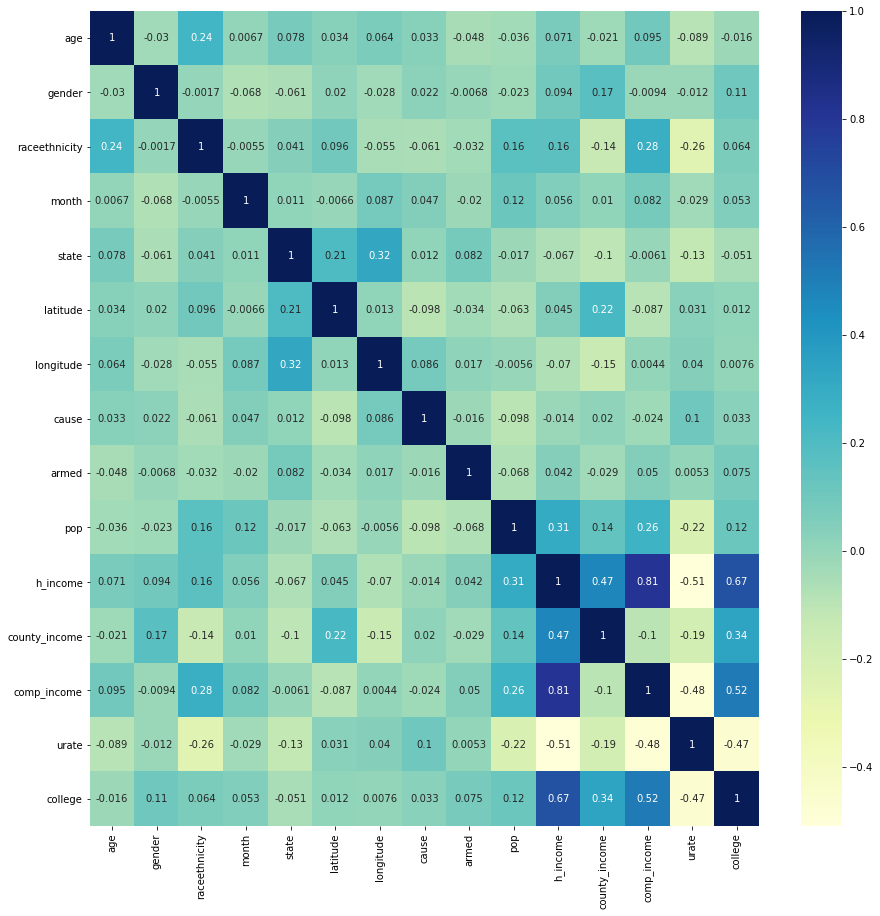

In [483]:
plt.figure(figsize=(15,15))
correlation=df.corr()
sns.heatmap(correlation,cmap='YlGnBu',annot=True)

In [ ]:
df.drop(['h_income'], axis = 1, inplace = True)
#Dropped h_income, because it is highly correlated to comp_income
df.head()